In [1]:
#https://blog.quantinsti.com/cross-validation-embargo-purging-combinatorial/

# Import necessary libraries
import numpy as np
import pandas as pd
from itertools import combinations
import itertools as itt
import os
os.chdir(r'C:\Users\donov\Downloads\Module6-1\Module6-1')
data =  pd.read_csv('seed1_train_backtested.csv')
from tqdm import tqdm

# Question 1
Suppose you have a data set of 10 bars, which include a test set of 2 bars. Denote those bars 1,2, 3...10. Produce 3 examples of distinct backtest paths, identify the train sets and test sets used in each path. (3 pt)


In [205]:
import pandas as pd
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt 
# creates list of bars
total_bars = list(range(1,11,1))

# combinatorial total bars choose 8
iter_object = combinations(total_bars, 8) 

# unpacks the iter object
combo_list = [i for i in iter_object]
train_set, test_set = [],[]

# seperates the train and test sets
for combo in range(len(combo_list)):
    train_set.append(combo_list[combo])
    test_values = set(total_bars)-set(combo_list[combo])
    test_values = sorted(test_values, reverse=True)
    test_set.append([x for x in test_values])

# combine into df and split convert test_set from set to list object
df = pd.concat([pd.Series(train_set),pd.Series(test_set)], axis=1)
df.columns = ['Train', 'Test']
[x for x in test_set[2]]
df.columns = ['Train', 'Test']
df = df.sort_values('Test', ascending=False)

# set up counters
paths = np.full((len(df['Test']),max(total_bars)),0)
bins = len(df['Test'])/max(total_bars)
row_counter = 0
split_counter = 0
path_count=0


for a, b in df['Test']:
    if a-b==1:
        path_count +=1
        split_counter = path_count
     
        paths[row_counter, a-1] = bins*path_count
        paths[row_counter, b-1] = bins*path_count

    else:
        paths[row_counter, b-1] = bins*path_count
        split_counter +=1
        paths[row_counter, a-1] = bins*split_counter
               
    if row_counter>(len(df['Test'])-1):
        break
    row_counter +=1    

In [206]:
paths = np.full((len(df['Test']),max(total_bars)),0)
bins = len(df['Test'])/max(total_bars)
row_counter = 0
split_counter = 0
path_count=0
for a, b in df['Test']:
    if a-b==1:
        path_count +=1
        split_counter = path_count
     
        paths[row_counter, a-1] = bins*path_count
        paths[row_counter, b-1] = bins*path_count

    else:
        paths[row_counter, b-1] = bins*path_count
        split_counter +=1
        paths[row_counter, a-1] = bins*split_counter
        

        
    if row_counter>(len(df['Test'])-1):
        break
    row_counter +=1    

## Answer 1

In [207]:
# Identifying train and test sets 
df.columns = ['Train', 'Test']
df.sort_values('Train', ascending=True)

,Train,Test
0,"(1, 2, 3, 4, 5, 6, 7, 8)","[10, 9]"
1,"(1, 2, 3, 4, 5, 6, 7, 9)","[10, 8]"
2,"(1, 2, 3, 4, 5, 6, 7, 10)","[9, 8]"
3,"(1, 2, 3, 4, 5, 6, 8, 9)","[10, 7]"
4,"(1, 2, 3, 4, 5, 6, 8, 10)","[9, 7]"
5,"(1, 2, 3, 4, 5, 6, 9, 10)","[8, 7]"
6,"(1, 2, 3, 4, 5, 7, 8, 9)","[10, 6]"
7,"(1, 2, 3, 4, 5, 7, 8, 10)","[9, 6]"
8,"(1, 2, 3, 4, 5, 7, 9, 10)","[8, 6]"
9,"(1, 2, 3, 4, 5, 8, 9, 10)","[7, 6]"


## Answer Question 1

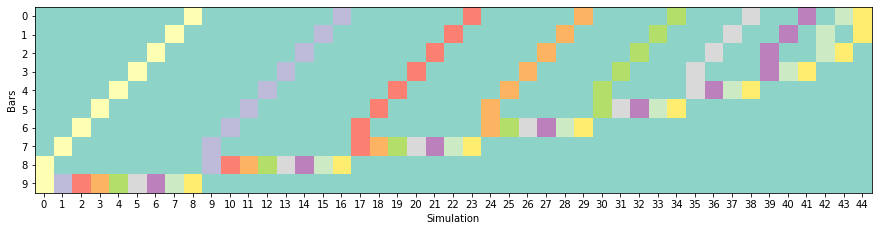

In [208]:
# Each path is a distinct color
plt.figure(figsize=(15,8))
plt.yticks(range(paths.shape[1]))
plt.ylabel('Bars')
plt.xlabel('Simulation')
plt.xticks(range(len(df)))
plt.xlabel('Simulation')
plt.imshow(paths.T, cmap='Set3')

# Question 2

For our SPX data set, suppose we pick 5 groups of training sets, and with test sets of size 2, create the set of backtest paths using get CPCVtestset function provided and compute their Sharpe ratios. What are the mean and standard deviation of this set of Sharpe ratios? How do they compare with the Sharpe ratios computed on the train and test sets in the Parts 1 and 3 of last week’s assignment? (7 pt)

In [2]:
# Install a pip package in the current Jupyter kernel 
# import sys # <-- no need to run this if hurst is already installed
#!pip install hurst
data.head()

,yyyymm,lty_FD,d/e,tms,Actual,Prediction,SPY,Log Returns,Dataset,Correct Pred Return,Short Returns,Long Returns,Total Return,Return Running Total
0,1993-03-01,-1.000399,-0.463653,0.0407,-1.0,-1.0,26.480898,-0.025921,Seed 1 Train,-0.025921,0.025921,NaN,0.025921,0.025921
1,1993-04-01,-0.997884,-0.453873,0.0414,1.0,1.0,25.803318,0.026612,Seed 1 Train,0.026612,NaN,0.026612,0.026612,0.052533
2,1993-05-01,-0.994700,-0.444019,0.0405,-1.0,-1.0,26.499224,0.003601,Seed 1 Train,0.003601,-0.003601,NaN,-0.003601,0.048932
3,1993-06-01,-1.040861,-0.434091,0.0361,-1.0,-1.0,26.594809,-0.004866,Seed 1 Train,-0.004866,0.004866,NaN,0.004866,0.053798
4,1993-07-01,-1.043409,-0.452650,0.0352,1.0,1.0,26.465725,0.037611,Seed 1 Train,0.037611,NaN,0.037611,0.037611,0.091409


In [125]:
def cpcv_generator(T, N, k):
    '''
      (isTest, paths)  = getCPCVtestset(T, N, k)
      Get train and test sets in LdP's CPCV. 
    
      T = length of data
      N = number of groups
      k = number of groups in test set. 
    
      isTest is a T x C(N, k) array, where each column is a logical array indicating
      which observation is in test set (the false ones are in train set) for a particular split.
      paths is a T x k/N C(N, k) array, where each column represents one
      backtest path, and each row denotes the column of isTest to be used for
      backtest.
    '''
    groupNum=np.full((T,1),np.nan)
    groupSize=np.floor(T/N).astype(int)
    for g in range(N-1):
        groupNum[range(g*groupSize,(g+1)*groupSize)]=g
    groupNum[range((g+1)*groupSize,groupNum.shape[0])]=N-1
    groupNum=groupNum.ravel().astype(int)

    # (Note from AFML: DePrado) This block is my rendition of the following short Matlab line:
    # testGroups=combnk(1:N, k);
    # All of the extra effort is to convert the iterator combinations(range(1,N+1),k)
    # into the realized array of groups.
    testGroups=np.array([])
    for comb in combinations(range(N),k):
        testGroups=np.append(testGroups,np.array(comb))
    testGroups=testGroups.astype(int).reshape(np.floor(testGroups.shape[0]/k).astype(int),k)

    isTestGroup=np.full((N,testGroups.shape[0]),False) #% isTestGroup(g, s)=true denotes group g in split s is a test set.
    isTest=np.full((T,testGroups.shape[0]),False)
    for s in range(isTest.shape[1]):
        for g in range(testGroups.shape[1]):
            isTestGroup[testGroups[s,g],s]=True 
            isTest[groupNum==testGroups[s,g],s]=True

    mypaths=np.full((np.unique(groupNum).shape[0],np.floor(k*testGroups.shape[0]/N).astype(int)),np.nan)    

    for p in range(mypaths.shape[1]):
        for g in range(mypaths.shape[0]):
            s=isTestGroup[g,:].argmax()
            mypaths[g,p]=s
            isTestGroup[g,s]=False
    mypaths=mypaths.astype(int)

    paths=np.full((T,mypaths.shape[1]),np.nan)
    for p in range(mypaths.shape[1]):
        for g in range(mypaths.shape[0]):
            paths[groupNum==g,p]=mypaths[g,p]
    paths=paths.astype(int)

    return (isTest,paths)

In [126]:
def purge(t1, test_times): # whatever is not in the train set should be in the test set
    train = t1.copy(deep=True) # copy of the index
    for start, end in test_times.iteritems():
        df_0 = train[(start <= train.index) & (train.index <= end)].index # train starts within test
        df_1 = train[(start <= train) & (train <= end)].index
        df_2 = train[(train.index <= start) & (end <= train)].index
        train = train.drop(df_0.union(df_1).union(df_2))
    return train

# AFML, snippet 7.2
def embargo_(times, pct_embargo, test_times):
    step = int(times.shape[0] * pct_embargo) # more complicated logic if needed to use a time delta
    print('step:', step)
    if step == 0:
        
        ans = pd.Series(times, index=test_times)
       
    else:
    
        ans = pd.Series(times[step:].values, index=times[:-step].index)

        ans = ans.append(pd.Series(times.iloc[:-1], index=times[-step:].index))
    return ans

def embargo(test_times, t1, pct_embargo=0.01): # done before purging
    # embargoed t1
    t1_embargo = embargo_(t1, pct_embargo, test_times)
    
    # test_start, test_end = test_times.index[0], test_times.index[-1]
    test_times_embargoed = t1_embargo.reindex(index=test_times.index)
    
    return test_times_embargoed

In [127]:
# len(data.dropna())/len(data)

# setting up the simulation loop
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# prediction and evalution times
# using business days, but the index is not holidays aware -- it can be fixed
t1_ = data.index
# recall that we are holding our position for 21 days
# normally t1 is important is there events such as stop losses, or take profit events
t1 = pd.Series(t1_[1:], index=t1_[:-1]) # t1 is both the trade time and the event time
t1.head() # notice how the events (mark-to-market) take place 5 days later

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [128]:
# realign data
data = data.loc[t1.index]
len(data), len(t1)

(50, 50)

In [129]:
len(train_seed_1)
  # setting up the simulation loop
    from tqdm.notebook import tqdm
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import BaggingClassifier

IndentationError: unexpected indent (<ipython-input-129-09df6219cc69>, line 3)

In [167]:
def CPCV_run(data_frame, seed, num_test_groups, num_groups):         
    # prediction and evalution times
    # using business days, but the index is not holidays aware -- it can be fixed
    t1_ = data_frame.index
    # recall that we are holding our position for 21 days
    # normally t1 is important is there events such as stop losses, or take profit events
    t1 = pd.Series(t1_[1:], index=t1_[:-1]) # t1 is both the trade time and the event time
    # realign data
    
    data_frame = data_frame.loc[t1.index]
    
    num_sim = len(data_frame)
    is_test, paths = cpcv_generator(num_sim, num_groups, num_test_groups)
    
    # define some arrays to store the prediction probabilities
    pred = np.full(is_test.shape, np.nan)

    if seed==1:
        feats = ['lty_FD', 'd/e', 'tms']
        np.random.seed(1)
    if seed==2:
        feats = ['e/p', 'd/e', 'infl']
        np.random.seed(2)
    X = data_frame[feats]
    y = data_frame['Actual']

    num_sim = is_test.shape[1] # num of simulations needed to generate all backtest paths
    for k in range(num_sim):
        # get train set|
        test_idx = is_test[:, k] 

        # convert numerical indices into time stamps
        test_times = t1.loc[test_idx]
        
        # embargo
        test_times_embargoed = embargo(test_times, t1, pct_embargo=0.01)

        # purge
        train_times = purge(t1, test_times_embargoed)

        # split training / test sets
        X_test = X.loc[test_times.index, :]
        y_test = y.loc[X_test.index]

        X_train = X.loc[train_times.index, :]
        y_train = y.loc[X_train.index]

        # reconstructing the backtest paths
        print('training classifier for simulation %s' % k)
        np.random.seed(42)
        base_est = DecisionTreeClassifier(criterion='entropy', 
                                          max_features='auto', 
                                          class_weight='balanced', 
                                          min_weight_fraction_leaf=0.05)
        clf = BaggingClassifier(base_estimator=base_est, n_estimators=50, max_features=.99)
        clf.fit(X_train, y_train)
        pred_ = clf.predict(X_test)

        # fill the backtesting prediction matrix
        pred[test_idx, k] = pred_

    num_ticks = len(data_frame)
    is_test, paths = cpcv_generator(num_ticks, num_groups, num_test_groups)
    backtest_paths = np.full((X.shape[0], paths.shape[1]), np.nan)
    #old_signal = data_frame['ret'].loc[X.index]
    ret = data_frame['Log Returns'].loc[X.index]

    for p in range(paths.shape[1]):

        for t, k in enumerate(paths[:, p]):

            backtest_paths[t, p] = pred[:,int(k)][t]*ret[t]    #( bool(pred[t, int(k)]) &  bool(y[t]) ) * ret[t]
    results = pd.DataFrame(backtest_paths, columns=['path1','path2','path3','path4'])
    path1_std = annualized_sharpe_ratio(results['path1'], 12)
    path2_std = annualized_sharpe_ratio(results['path2'], 12)
    path3_std = annualized_sharpe_ratio(results['path3'], 12)
    path4_std = annualized_sharpe_ratio(results['path4'], 12)
    std = pd.Series([path1_std,path2_std, path3_std, path4_std], name='Standard Deviation')
    path1_ann_ret = annualized_return(results['path1'], len(results['path1']))
    path2_ann_ret = annualized_return(results['path2'], len(results['path2']))
    path3_ann_ret = annualized_return(results['path3'], len(results['path3']))
    path4_ann_ret = annualized_return(results['path4'], len(results['path4']))
    ann_ret = pd.Series([path1_ann_ret,path2_ann_ret,path3_ann_ret,path4_ann_ret], name='Annual Return')
    df = pd.DataFrame({'Standard Deviation': std, 'Annual Return':ann_ret})
    df.index =['path1','path2','path3','path4']
    df
    return df

In [168]:
def annualized_return(returns, periods):
    annualized_return = returns.mean() * 12
    return round(annualized_return, 4)

def annualized_sharpe_ratio(returns, periods):
    sharpe_ratio = returns.mean()/returns.std()
    annualized_sharpe_ratio = sharpe_ratio*np.sqrt(12)
    return round(annualized_sharpe_ratio, 4)

In [169]:
train_seed_1 =  pd.read_csv('seed1_train_backtested.csv')
test_seed_1 =  pd.read_csv('seed1_test_backtested.csv')
train_seed_2 =  pd.read_csv('seed2_train_backtested.csv')
test_seed_2 =  pd.read_csv('seed2_test_backtested.csv')

In [ ]:
train_seed_1_results = CPCV_run(train_seed_1,1, 2,5)
test_seed_1_results = CPCV_run(test_seed_1, 1, 2,5)
train_seed_2_results = CPCV_run(train_seed_2,2, 2,5)
test_seed_2_results = CPCV_run(test_seed_2,2, 2,5)

# Question 2

For our SPX data set, suppose we pick 5 groups of training sets, and with test sets of
size 2, create the set of backtest paths using get CPCVtestset function provided and
compute their Sharpe ratios. What are the mean and standard deviation of this set of
Sharpe ratios? How do they compare with the Sharpe ratios computed on the train
and test sets in the Parts 1 and 3 of last week’s assignment? (7 pt)

## Answer
Seed 1
- Part 1 module 6: train 5.25, test 0.52
- Module 7 assignment: train 0.0941, test 0.2422

Seed 2
- Part 3 module 6: train 5.25, test .4216
- Module 7 assigment: train .6482, test .3825


Using cross validation it really puts a fine point on the sharpe ratio. For seed 1, there's nearly a 50% reduction from last week, but seed 2 was very close. Something that might be worthwhile to do would be to run a large number of random seeds and aggregate those results as well for a more accurate benchmark. 

In [171]:
train_seed_1_results.describe()

,Standard Deviation,Annual Return
count,4.000000,4.000000
mean,0.094050,0.010200
std,0.744208,0.086587
min,-0.610200,-0.072200
25%,-0.413550,-0.049250
50%,-0.038250,-0.004550
75%,0.469350,0.054900
max,1.062900,0.122100


In [172]:
test_seed_1_results.describe()

,Standard Deviation,Annual Return
count,4.000000,4.000000
mean,0.242175,0.027100
std,0.532373,0.060154
min,-0.397900,-0.045400
25%,-0.091300,-0.010450
50%,0.313850,0.035450
75%,0.647325,0.073000
max,0.738900,0.082900


In [173]:
train_seed_2_results.describe()

,Standard Deviation,Annual Return
count,4.000000,4.000000
mean,0.648175,0.075325
std,0.430948,0.048906
min,0.264600,0.031700
25%,0.281325,0.033725
50%,0.637550,0.074300
75%,1.004400,0.115900
max,1.053000,0.121000


In [174]:
test_seed_2_results.describe()

,Standard Deviation,Annual Return
count,4.000000,4.000000
mean,0.382525,0.042675
std,0.461028,0.050880
min,-0.077100,-0.008900
25%,0.125250,0.014350
50%,0.300200,0.034300
75%,0.557475,0.062625
max,1.006800,0.111000
